In [15]:
k4towceratio <- read.csv("./plotting/K4toWCE_ratio.csv")
k4towcereadcount <- read.csv("./plotting/K4toWCE_readcount.csv")
k4ratio <- read.csv("./plotting/mergedK4ratio.csv")

In [16]:
row.names(k4towceratio) <- k4towceratio$start
row.names(k4towcereadcount) <- k4towcereadcount$start
row.names(k4ratio) <- k4ratio$start

In [17]:
k4towceratio <- k4towceratio[,2:11]
k4towcereadcount <- k4towcereadcount[,2:11]
k4ratio <- k4ratio[,2:11]

In [18]:
k4towceratio_matrix <- data.matrix(k4towceratio)
k4towcereadcount_matrix <- data.matrix(k4towcereadcount)
k4ratio_matrix <- data.matrix(k4ratio)

In [37]:
cluster <- k4ratio$cluster
table(cluster)
clustersep <- c(680,680+165,680+165+66,680+165+66+76,680+165+66+76+94,680+165+66+76+94+220,680+165+66+76+94+220+249)

cluster
  1   2   3   4   5   6   8 
680 165  66  76  94 220 249 

In [46]:
my_palette <- colorRampPalette(c("blue","navy",'black',"yellow3","yellow"))(n=210)
heatmap.2(k4ratio_matrix,
  density.info="none",  # turns off density plot inside color legend
  trace="none",         # turns off trace lines inside the heat map
  dendrogram="none",     # only draw a row dendrogram
#   labRow = cr_names.var,
  col = my_palette,
  lhei = c(0.2,1),      # color key size
  srtCol = 45,          # rotate row label
#   main = 'deGenes_opt1',
  cexCol = 0.6,
#   split = c(k4ratio$cluster),
# cexRow = 0.8,
  margins = c(10,12),
  rowsep = clustersep,
  Rowv=FALSE,
  Colv=FALSE,
  sepwidth = 5,
  Colv="NA")            # turn off column clustering

ERROR: Error in heatmap.2(k4ratio_matrix, density.info = "none", trace = "none", : formal argument "Colv" matched by multiple actual arguments


In [1]:
library(ComplexHeatmap)

Loading required package: grid


In [1]:
df_vector <- list()
minval <- 50
maxval <- 90
Mb <- 1000000

In [2]:
for (hr in 0:8){
    filename <- sprintf("./counts/exp1_%shr_K4me3_HJWMVBGXX.dupsRemoved.merged.sorted.counts.bed", hr)
    df <- read.csv(filename, sep="\t", col.names=c("chr","start","end","readcount"))
    df_vector[[hr+1]] <- subset(df, select=c("start","readcount"), start>=minval*Mb & start <=maxval*Mb )
}

In [4]:
zscore <- function(data){
    M <- matrix(data$ratio)
    m <- mean(M, na.rm=TRUE)
    s <- sd(M, na.rm=TRUE)
    (data$ratio - m)/s
}


In [16]:
smooth <- function(data, window_size = 100000, stepsize = 50000){
    newx <- list()
    newy <- list()
    counter <- 1
    i <- minval*Mb
    # increase by stepsize, take mean of each window
    while (i < maxval *Mb-stepsize){
        center <- i+stepsize
        x <- subset(data, start>=i & start < i+window_size)
        i <- i + stepsize
        newx[[i]] <- center
        newy[[i]] <- mean(x$zscore)
        counter <- counter + 1
    }
    return(list(v1=newx,v2=newy))
}

In [14]:
i <- 0
background <- df_vector[[1]]
for (i in 2:9){
#     df_vector[[i]]$zscore <- df_vector[[i]]$readcount
    m <- merge(x=background, y=df_vector[[i]], by="start", all.x=TRUE)
    m$ratio <- m$readcount.y/background$readcount
    m$zscore <- zscore(m)
    df_vector[[i]] <- m
}

In [20]:
coor <- smooth(df_vector[[2]])

In [22]:
df_vector[[2]]

start,readcount,readcount.x,readcount.y,ratio,zscore
50000000,938,938,471,0.5021322,-1.08065837
50005000,862,862,737,0.8549884,-0.38175796
50010000,858,858,673,0.7843823,-0.52160711
50015000,2523,2523,1566,0.6206897,-0.84583224
50020000,2397,2397,1259,0.5252399,-1.03488910
50025000,621,621,371,0.5974235,-0.89191537
50030000,375,375,674,1.7973333,1.48473967
50035000,600,600,977,1.6283333,1.15000226
50040000,749,749,813,1.0854473,0.07471070
50045000,524,524,585,1.1164122,0.13604281


# Distribution Histograms

### Ratio Distribution 

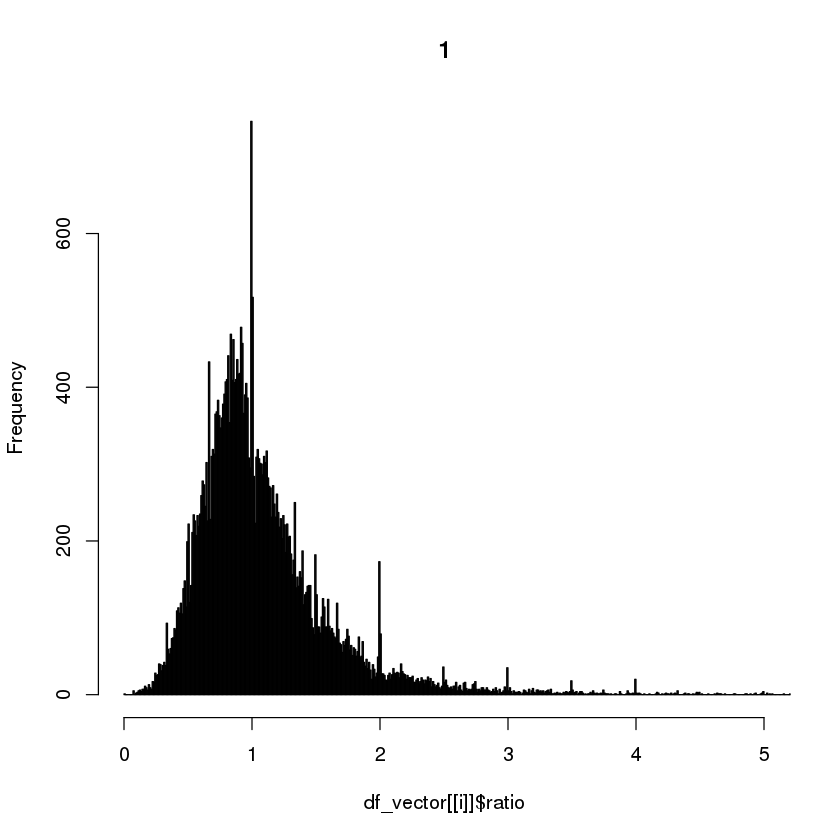

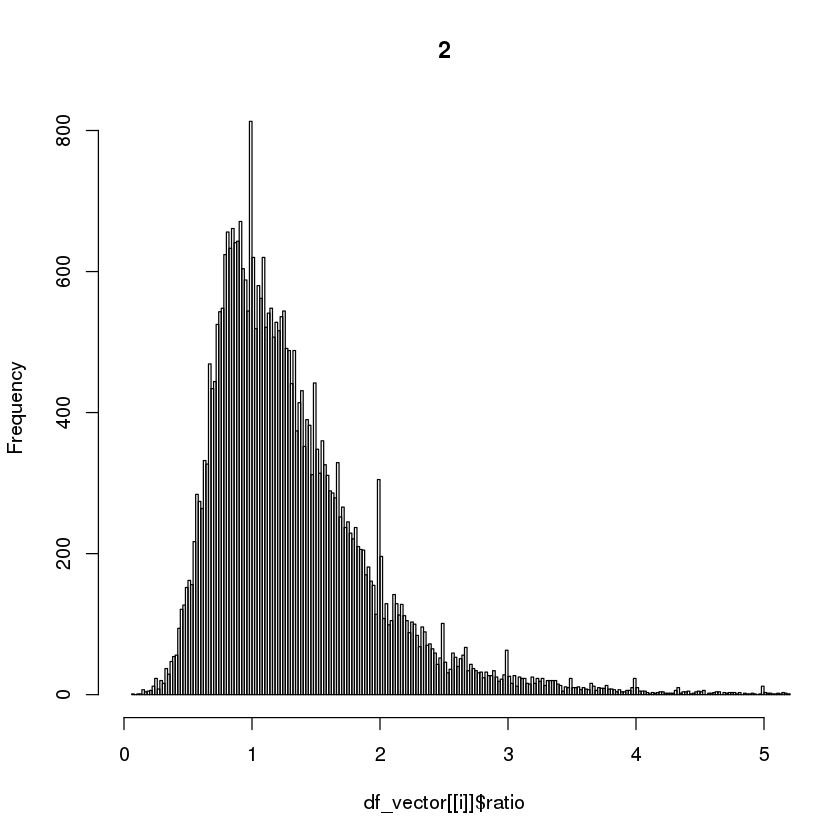

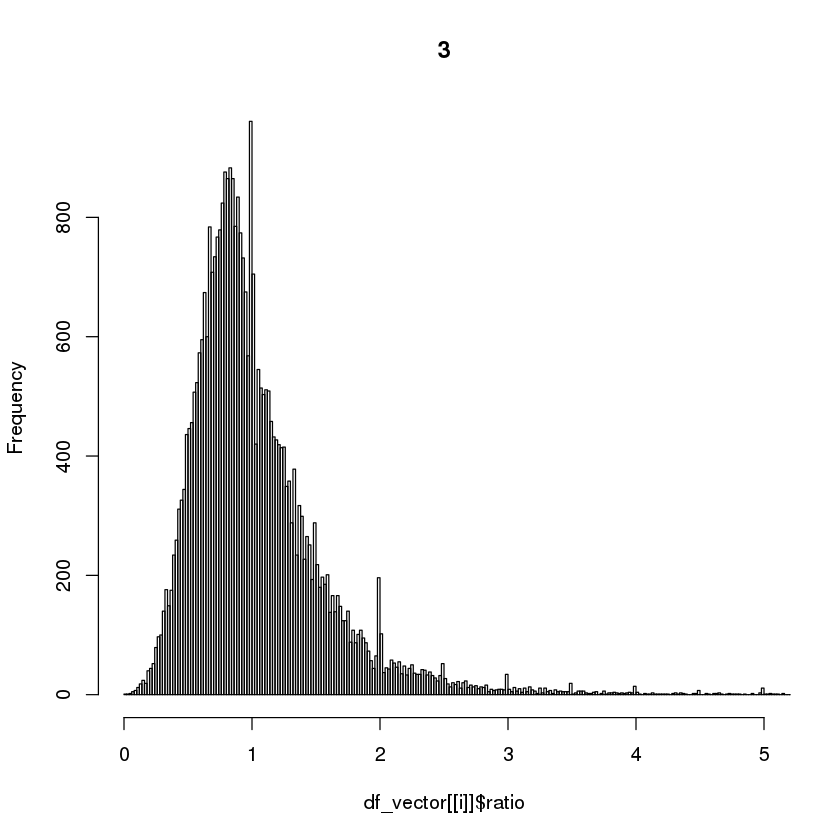

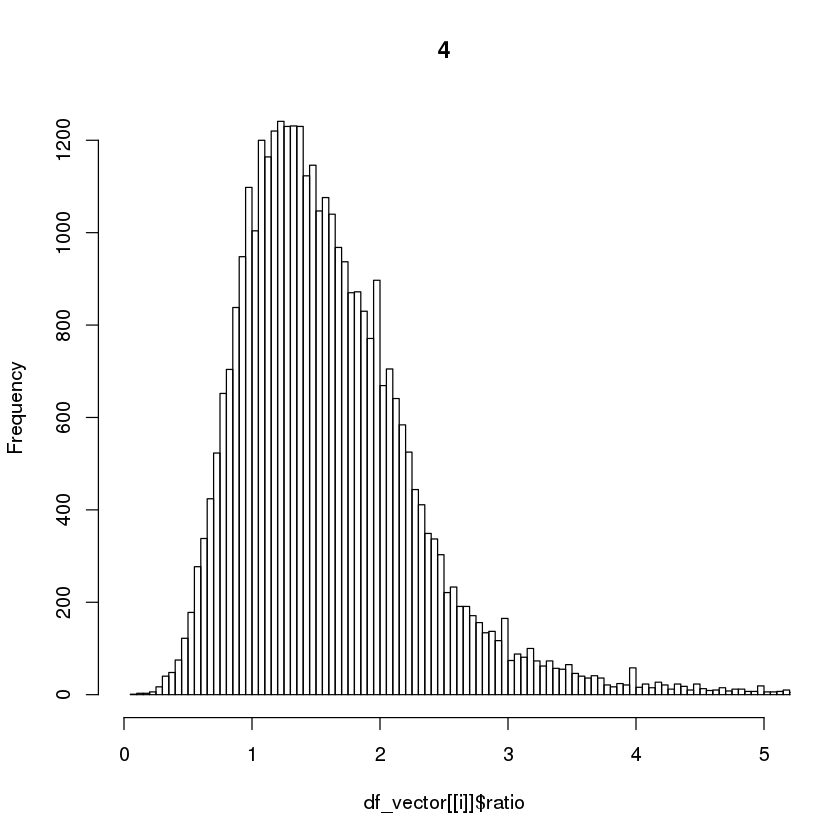

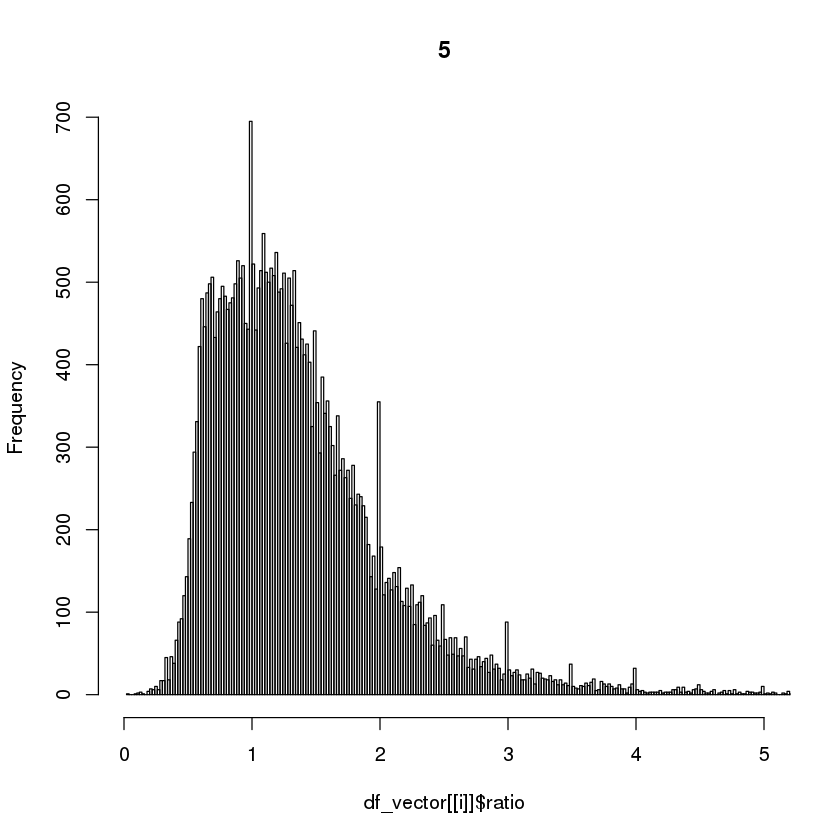

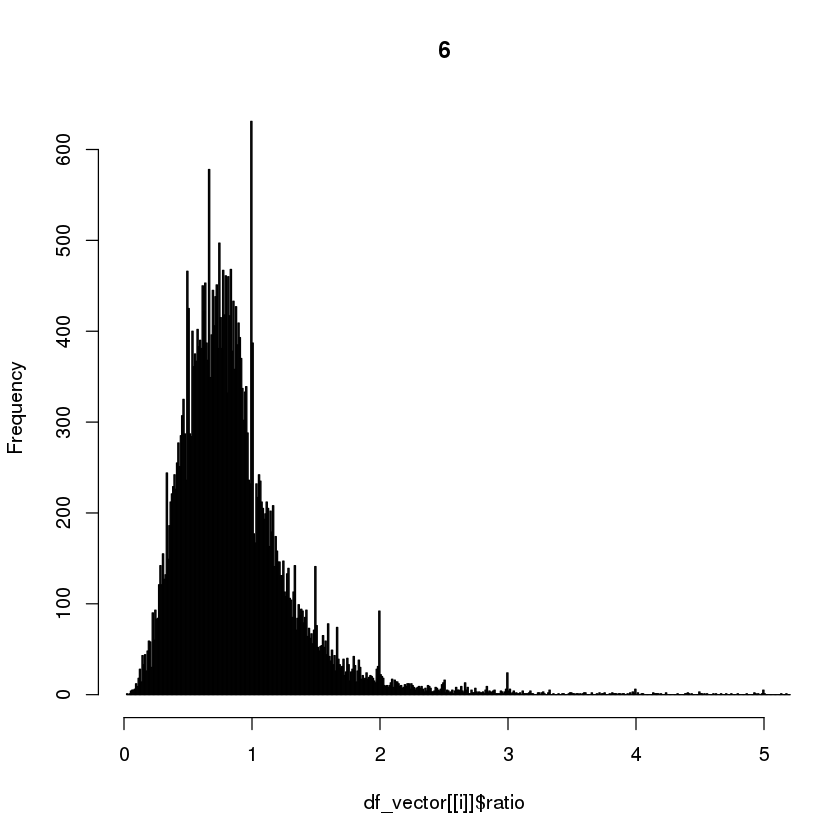

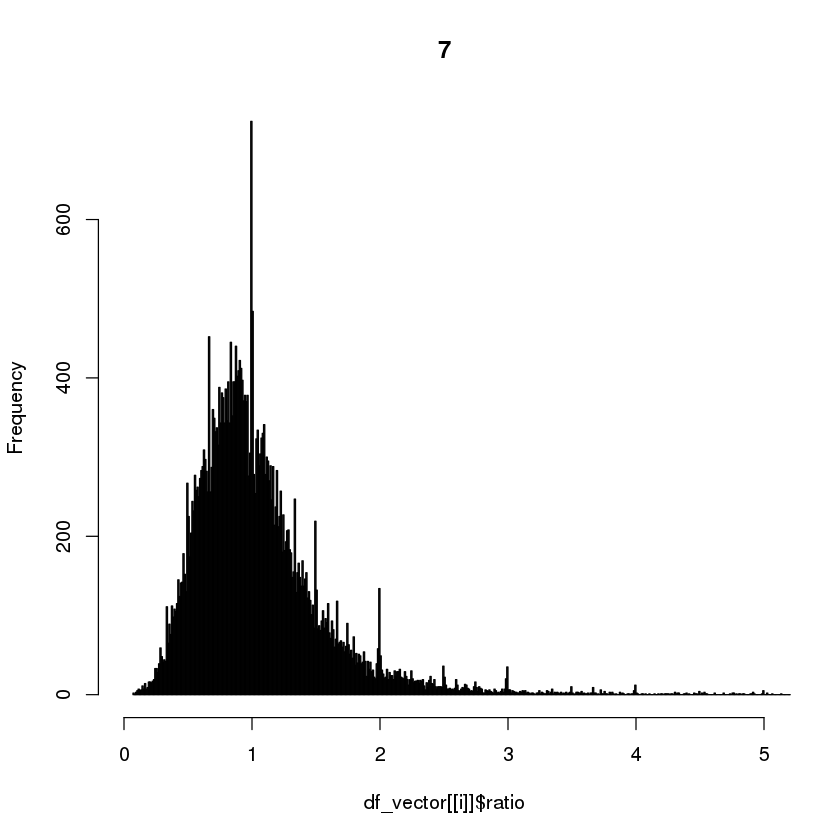

In [61]:
for (i in 2:8){
    hist(df_vector[[i]]$ratio,xlim=range(0,5), breaks=1000, main=i-1)
}

### Zscore Distribution

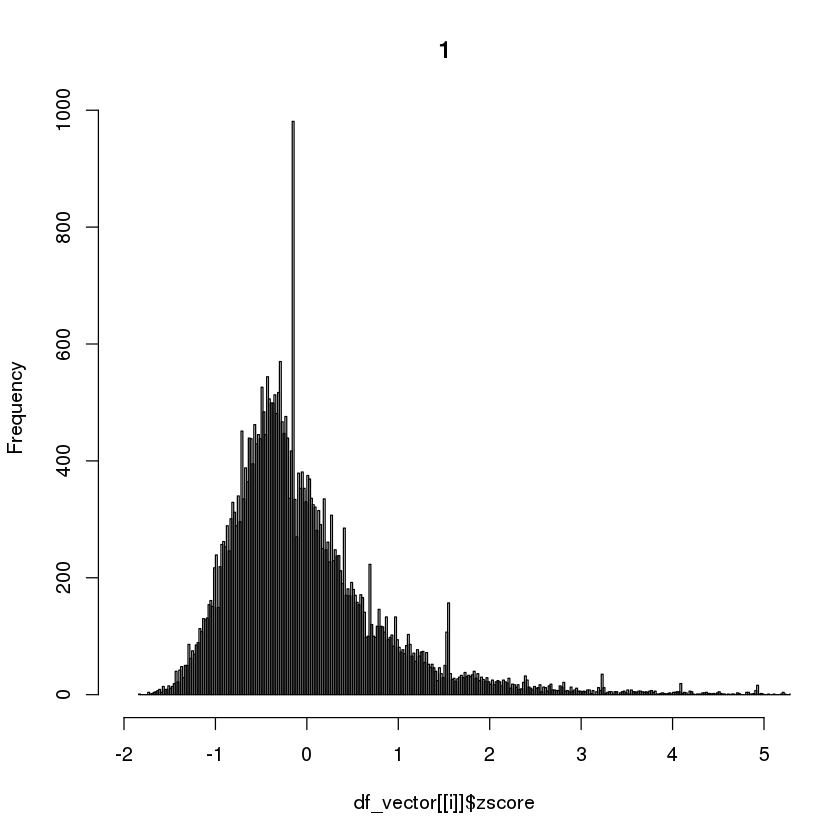

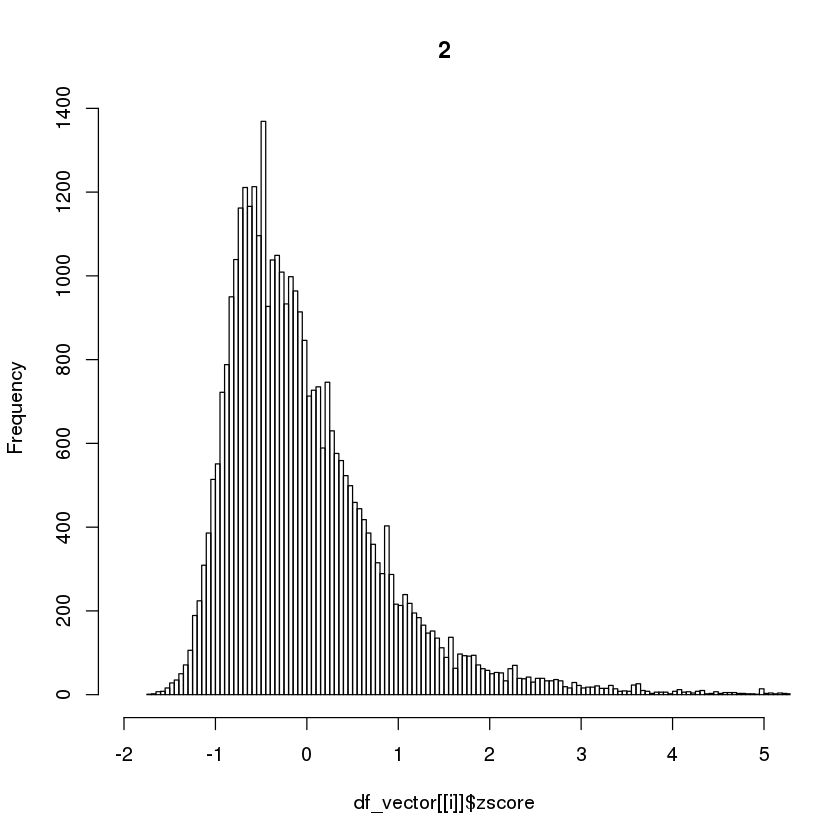

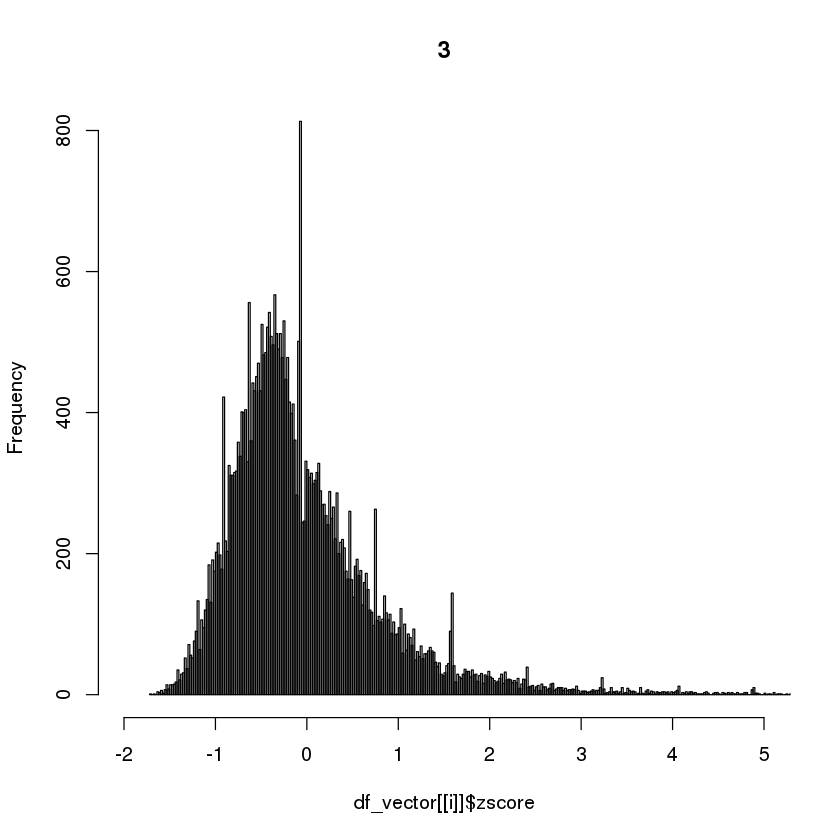

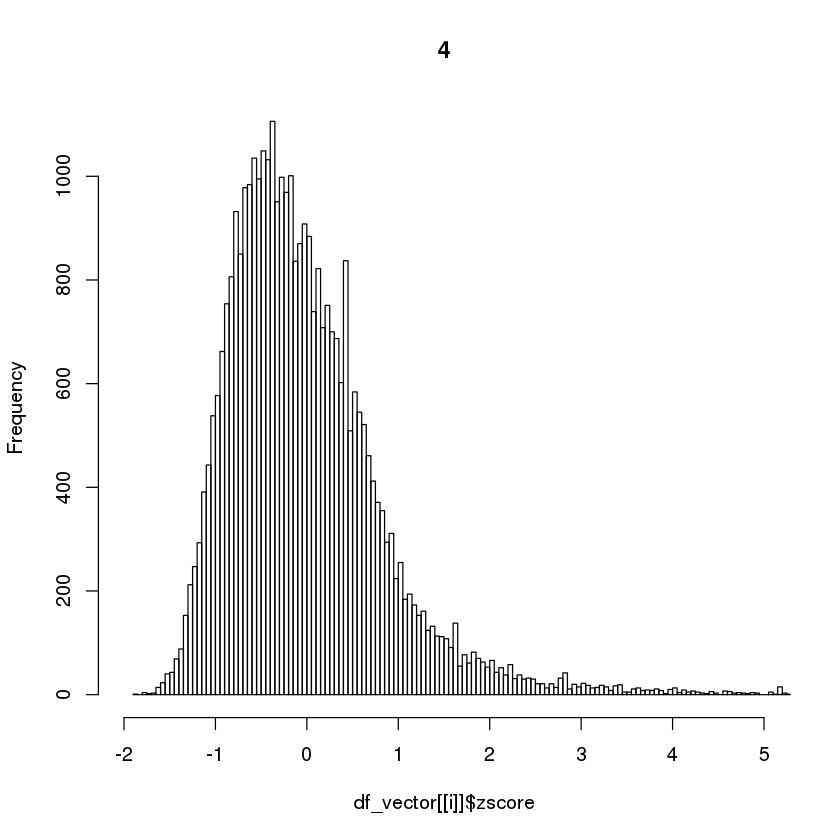

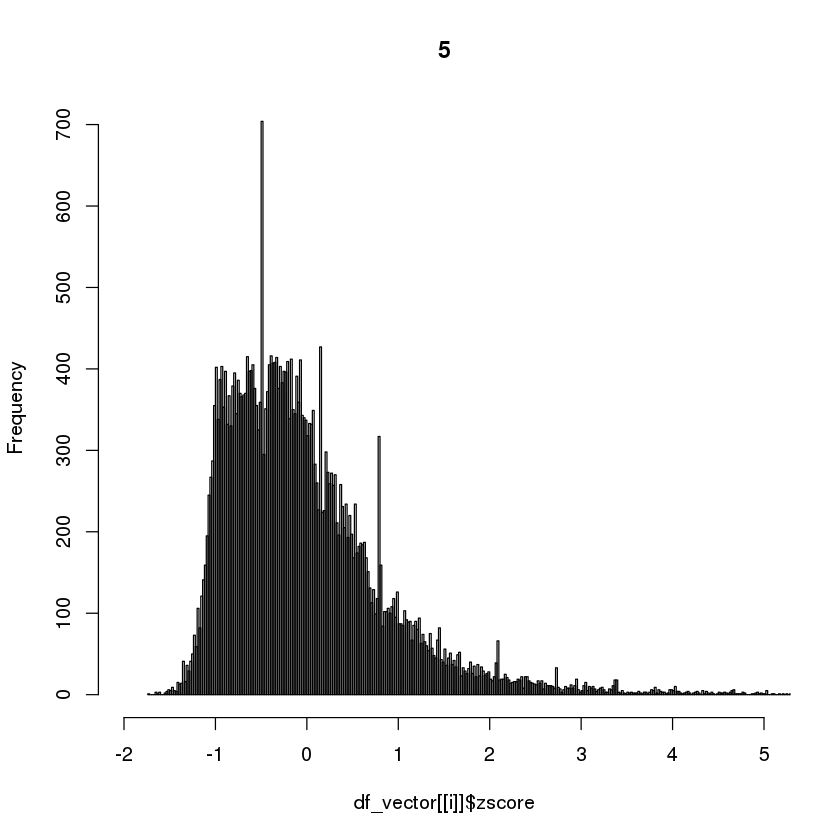

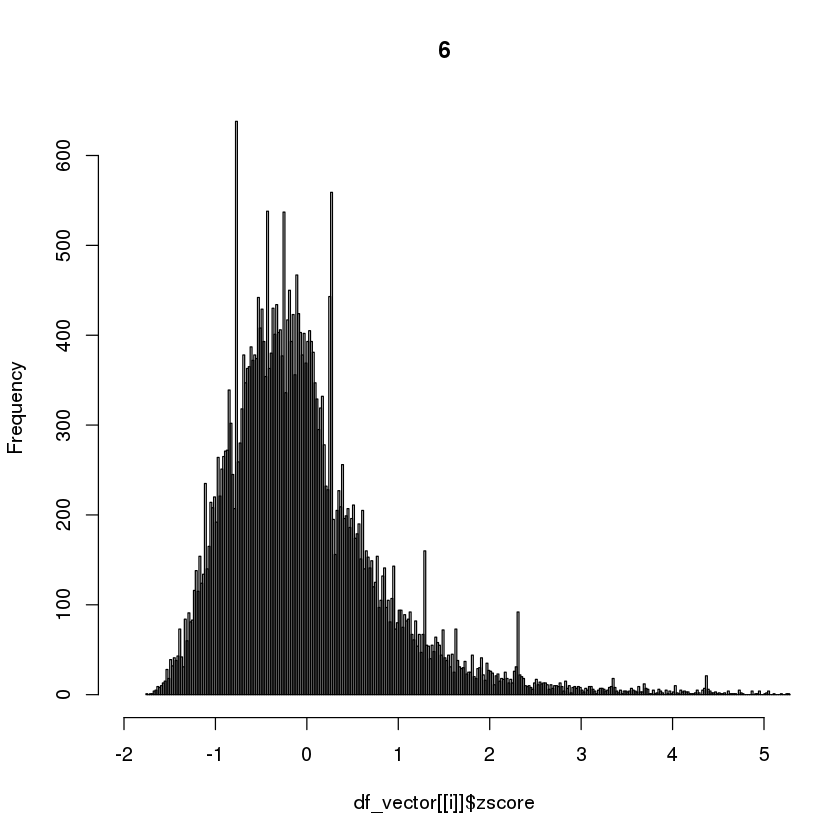

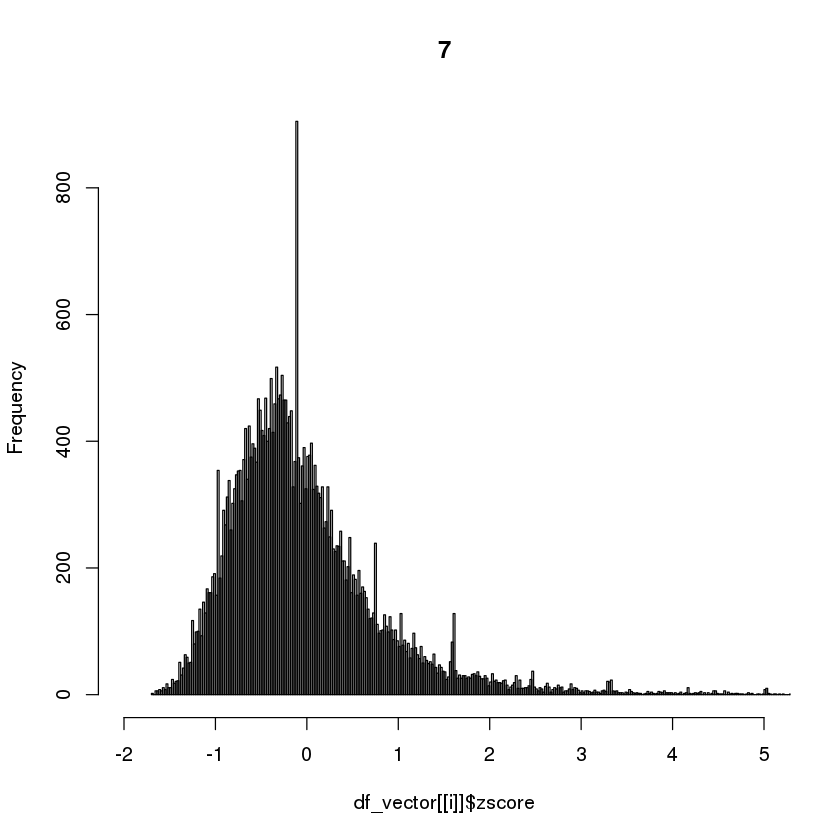

In [16]:
for (i in 2:8){
    hist(df_vector[[i]]$zscore,xlim=range(-2,5), breaks=1000, main=i-1)
}